#### MOVIE RATING PREDICTION WITH PYTHON
- Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.
- The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.
- Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.

#### Dataset - https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies

##### Analysing the data and noticed some trends.
- Year with best rating
- Does length of movie have any impact with the rating?
- Top 10 movies according to rating per year and overall.
- Number of popular movies released each year.
- Counting the number of votes which movies preformed better in rating per year and overall.
- Which director directed the most movies
- Which actor starred in the movie

### Steps
#### Preparing the environment
1. Importing the necessary packages and modules
2. Reading the required files in a Data Frame
    - We can see that only rating is of float datatype and all the other columns are of objcect datatype
    - Also we see alot missing values throughout
#### Date Preprocessing
3. We see that there alot of missing values in the Target column itself.
    - Droping the rows with missing values in the target column.
    - We cannot train a regression model with missing target values, so droping them from the training set.
    - Considering the rows with missing values in target as the test dataset.
3. Train and test (validation) split
4. Checking for duplicate rows
    - 6 duplicate rows were removed from the test data frame.
5. Missing values treatment.
    - We see that there are alot mire missing values in the test datframe, rather than in the other dtaframes.
    - Use the train and validation dataframes to fill the missing values in the test dataframe.
    - Filling the missing values in Year column
        - We see that there are no missing values in Training and Validation datasets.
        - Coverting the values in column from string to integer
        - Filling the null values in test dataset with mode of train, even tough it is an int feature the column is categorical.
    - Filling the missing values in duration Duration column.
        - We see missing values in all datasets.
        - Converting the duration to float.
        - Checking for outliers, if there are outliers needs to filled with median if not with mean.
        - We see outliers in all datasets, so filling the misssing values to median.
    - Filling the missing values in Genre column.
        - Spliting the genre column into 3 columns.
        - Checking the missing values in each column of genre to decide whether to drop or impute the column.
        - Using mode imputaion method to fill the missing values based on the mode of a particular year.
        - Filling the missing values in the genre column of training dataset with the mode genre of training dataset.
    - Missing values in Votes columns
        - We see that there are no missing values for Votes columns, as the rating is provided based on the votes.
        - There are only missing values in Votes column in test datset, as there are no ratings available.
        - We cannot impute the Votes values in the test dataset, as that is connected to the target variable.
        - We first need to see the significance of that column and then need to decide if it needs to be droped or not.
        - For now we can either leave the column as it is or chnage everthing as 0, it can be decided only after building and checking each scenario.
        - There is only one non-null value in test datset, that also seems to be a wrong value, that is changed back to nan.
    - Deciding to fill the missing values in the Director and Actors column with 'Not Available', if there is any impact because of this then, need to check and do the necessary changes.
#### Exploratory Data Analysis
6. Checking the correlation of the filled dataset.

In [1]:
# Importing the necessary packages and modules

# !pip install dtale

import warnings
warnings.filterwarnings('ignore')

import dtale
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns
import statsmodels.api as sm
import statsmodels.regression.linear_model as smf

from imblearn.over_sampling import RandomOverSampler
from numba import jit, cuda
# from pandas_profiling import ProfileReport
# from pycaret.classification import *
# from pycaret.regression import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set()
%matplotlib inline

In [2]:
# Reading the dataset into a data frame
# Getting error as ''utf-8' codec can't decode byte 0xe1 in position 76763: invalid continuation byte'
# So using 'encoding = 'latin-1'

movies_df = pd.read_csv("02_IMDb Movies India.csv", encoding = 'latin-1')
movies_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
movies_df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [5]:
# Checking for duplicate rows

movies_df.duplicated().sum()

6

- Only one column is of float datatype, all the other columns are of object datatype.
- We see a lot of missing values in the target column.
- Creating a new training data frame where there are missing values in the target column
- We see there are 6 duplicate rows in our dtaset

In [6]:
# Spliting the data based on target column

rest_df, test_df = [x for y, x in movies_df.groupby(movies_df['Rating'].isna())]

In [7]:
test_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
14,101 Ratein,(1990),NaN,Thriller,NaN,NaN,Harish,Saraswati,Disco Shanti,NaN


In [8]:
rest_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [9]:
# Train test (validation) split

train_df, validation_df = train_test_split(rest_df, train_size = 0.75, random_state = 101)
train_df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
11500,Rahi,(1953),139 min,Drama,7.0,28,Khwaja Ahmad Abbas,Dev Anand,Nalini Jaywant,Balraj Sahni
5167,Gooli,(2008),138 min,"Action, Drama, Romance",6.4,80,P. Satya,Sudeep,Mamta Mohandas,Kishore Kumar G.


In [10]:
validation_df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12679,Seeking Happily Ever After,(2018),104 min,"Drama, Romance",6.8,"1,117",Harish Vyas,Shivani Raghuvanshi,Anshuman Jha,Ekavali Khanna
12294,Samar,(1998),126 min,Drama,7.5,31,Shyam Benegal,Rajeshwari Sachdev,Rajit Kapoor,Ravi Jhankal


In [11]:
# Checking for duplicate rows

train_df.duplicated().sum()

0

In [12]:
validation_df.duplicated().sum()

0

In [13]:
test_df.duplicated().sum()

6

We see that all the duplicate values are in test dataframe, proceeding to remove the duplicates.

In [14]:
test_df[movies_df.duplicated(keep = False)]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1249,Arab Ka Sona - Abu Kaalia,(1979),NaN,Action,NaN,NaN,Master Bhagwan,Meena Rai,Dara Singh,NaN
1250,Arab Ka Sona - Abu Kaalia,(1979),NaN,Action,NaN,NaN,Master Bhagwan,Meena Rai,Dara Singh,NaN
1768,Balidan,(1992),NaN,Drama,NaN,NaN,NaN,NaN,NaN,NaN
1769,Balidan,(1992),NaN,Drama,NaN,NaN,NaN,NaN,NaN,NaN
4722,First Time - Pehli Baar,(2009),NaN,NaN,NaN,NaN,Raja Bundela,Zeenat Aman,Nitin Arora,Raj Babbar
4723,First Time - Pehli Baar,(2009),NaN,NaN,NaN,NaN,Raja Bundela,Zeenat Aman,Nitin Arora,Raj Babbar
9712,Musafir,NaN,NaN,Thriller,NaN,NaN,Shiva Dagar,NaN,NaN,NaN
9713,Musafir,NaN,NaN,Thriller,NaN,NaN,Shiva Dagar,NaN,NaN,NaN
13068,Shivani,(2019),NaN,Crime,NaN,NaN,Ugresh Prasad Ujala,Santosh,NaN,NaN
13069,Shivani,(2019),NaN,Crime,NaN,NaN,Ugresh Prasad Ujala,Santosh,NaN,NaN


In [15]:
# Removing the duplicate values

test_df.drop_duplicates(inplace = True)
test_df.duplicated().sum()

0

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5939 entries, 11500 to 9574
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5939 non-null   object 
 1   Year      5939 non-null   object 
 2   Duration  4393 non-null   object 
 3   Genre     5860 non-null   object 
 4   Rating    5939 non-null   float64
 5   Votes     5939 non-null   object 
 6   Director  5935 non-null   object 
 7   Actor 1   5837 non-null   object 
 8   Actor 2   5783 non-null   object 
 9   Actor 3   5713 non-null   object 
dtypes: float64(1), object(9)
memory usage: 510.4+ KB


In [17]:
train_df.describe()

,Rating
count,5939.000000
mean,5.859118
std,1.384323
min,1.100000
25%,4.900000
50%,6.000000
75%,6.900000
max,9.700000


In [18]:
train_df.describe(include = 'all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5939,5939,4393,5860,5939.000000,5939,5935,5837,5783,5713
unique,5612,92,172,380,NaN,1643,2623,2103,2385,2566
top,Sanjog,(2019),120 min,Drama,NaN,7,Mahesh Bhatt,Dharmendra,Rekha,Pran
freq,4,192,132,910,NaN,171,39,106,54,57
mean,NaN,NaN,NaN,NaN,5.859118,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.384323,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.900000,NaN,NaN,NaN,NaN,NaN


In [19]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 12679 to 2263
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1980 non-null   object 
 1   Year      1980 non-null   object 
 2   Duration  1458 non-null   object 
 3   Genre     1957 non-null   object 
 4   Rating    1980 non-null   float64
 5   Votes     1980 non-null   object 
 6   Director  1979 non-null   object 
 7   Actor 1   1957 non-null   object 
 8   Actor 2   1936 non-null   object 
 9   Actor 3   1914 non-null   object 
dtypes: float64(1), object(9)
memory usage: 170.2+ KB


In [20]:
validation_df.describe()

,Rating
count,1980.000000
mean,5.789141
std,1.373123
min,1.600000
25%,4.900000
50%,5.900000
75%,6.800000
max,10.000000


In [21]:
validation_df.describe(include = 'all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,1980,1980,1458,1957,1980.000000,1980,1979,1957,1936,1914
unique,1955,89,144,243,NaN,750,1188,920,1066,1114
top,Thokar,(2017),135 min,Drama,NaN,9,Hrishikesh Mukherjee,Jeetendra,Rekha,Pran
freq,3,66,43,267,NaN,65,14,41,25,18
mean,NaN,NaN,NaN,NaN,5.789141,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.373123,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.600000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.900000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7584 entries, 0 to 15507
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7584 non-null   object 
 1   Year      7057 non-null   object 
 2   Duration  1388 non-null   object 
 3   Genre     5810 non-null   object 
 4   Rating    0 non-null      float64
 5   Votes     1 non-null      object 
 6   Director  7065 non-null   object 
 7   Actor 1   6094 non-null   object 
 8   Actor 2   5403 non-null   object 
 9   Actor 3   4736 non-null   object 
dtypes: float64(1), object(9)
memory usage: 651.8+ KB


In [23]:
test_df.describe()

,Rating
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [24]:
test_df.describe(include = 'all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,7584,7057,1388,5810,0.0,1,7065,6094,5403,4736
unique,7122,101,144,242,NaN,1,3766,2956,2893,2603
top,Mamta,(2021),120 min,Drama,NaN,$5.16M,Jayant Desai,Master Bhagwan,Helen,Jeevan
freq,6,314,65,1602,NaN,1,52,61,38,34
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
train_df.shape

(5939, 10)

In [26]:
validation_df.shape

(1980, 10)

In [27]:
test_df.shape

(7584, 10)

### Handling missing values

In [28]:
# Checking for missing values

train_missing = list(train_df.isnull().sum())
val_missing = list(validation_df.isnull().sum())
test_misisng = list(test_df.isnull().sum())

In [29]:
# Checking the percentage of missing values

train_missing_percent = list(train_df.isnull().sum() / len(train_df) * 100)
val_missing_percent = list(validation_df.isnull().sum() / len(validation_df) * 100)
test_misisng_percent = list(test_df.isnull().sum() / len(test_df) * 100)

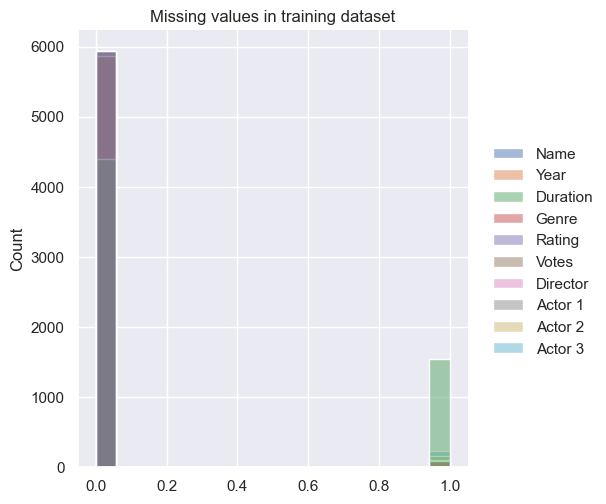

In [30]:
sns.displot(train_df.isnull())
plt.title("Missing values in training dataset")
plt.show()

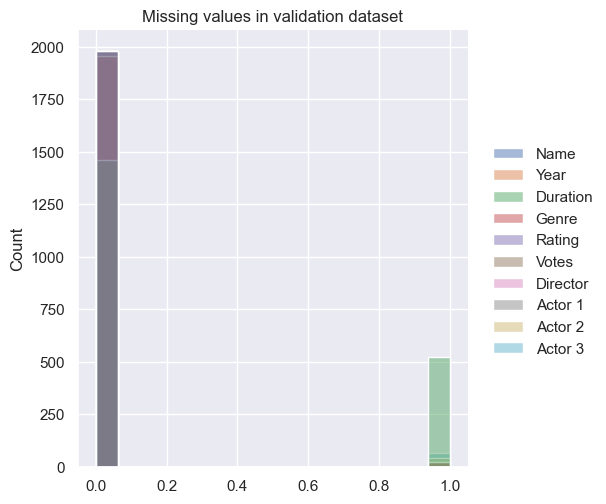

In [31]:
sns.displot(validation_df.isnull())
plt.title("Missing values in validation dataset")
plt.show()

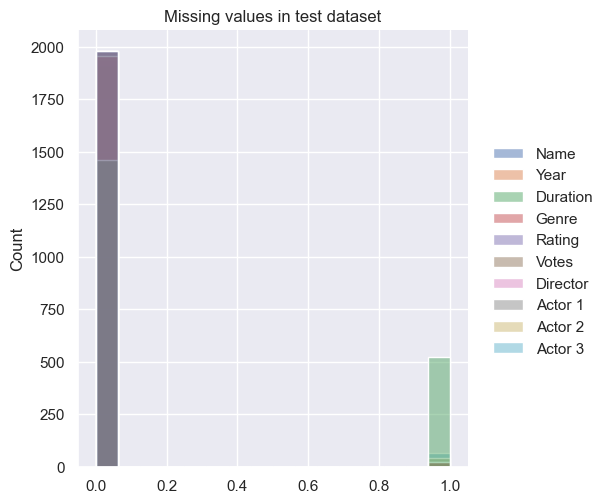

In [32]:
sns.displot(validation_df.isnull())
plt.title("Missing values in test dataset")
plt.show()

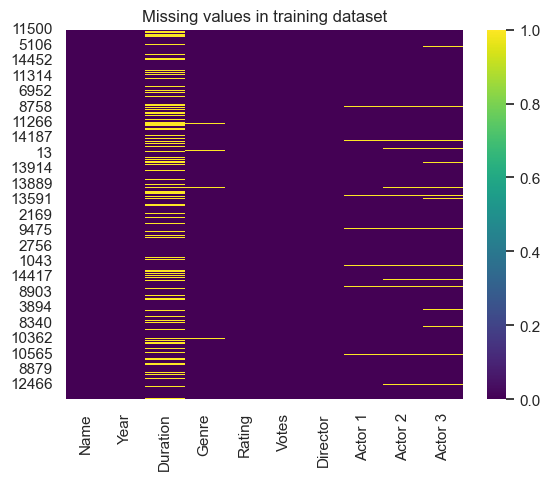

In [33]:
sns.heatmap(train_df.isnull(), cmap = 'viridis')
plt.title("Missing values in training dataset")
plt.show()

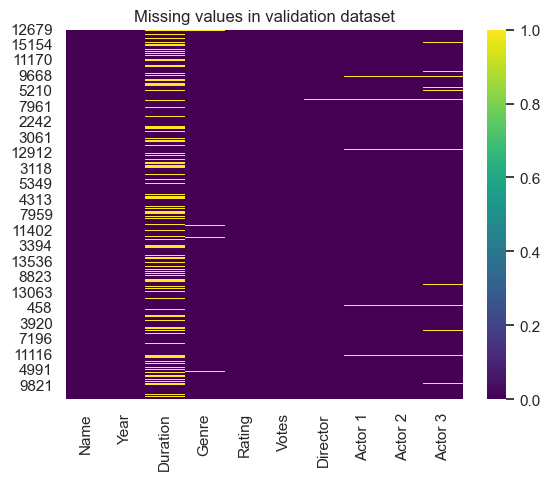

In [34]:
sns.heatmap(validation_df.isnull(), cmap = 'viridis')
plt.title("Missing values in validation dataset")
plt.show()

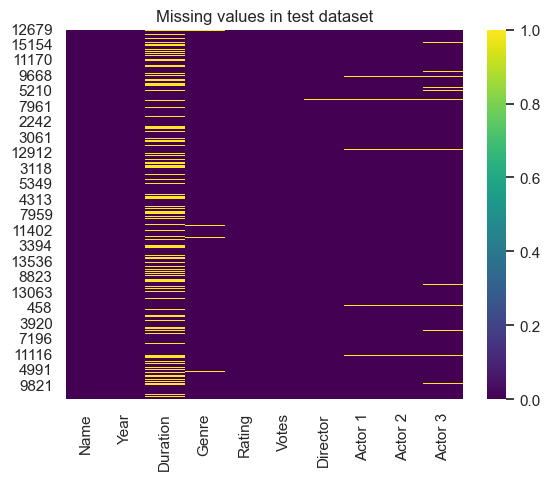

In [35]:
sns.heatmap(validation_df.isnull(), cmap = 'viridis')
plt.title("Missing values in test dataset")
plt.show()

In [36]:
# Missing values dataframe

missing_df = pd.DataFrame({'Columns' : list(train_df.columns), 'Train_missing' : train_missing, 'Percent_Train_missing' : train_missing_percent, 
                'Validation_missing' : val_missing, 'Percent_Val_missing' : val_missing_percent, 'Test_missing' : test_misisng, 
                           'Percent_Test_missing' : test_misisng_percent})
missing_df

,Columns,Train_missing,Percent_Train_missing,Validation_missing,Percent_Val_missing,Test_missing,Percent_Test_missing
0,Name,0,0.000000,0,0.000000,0,0.000000
1,Year,0,0.000000,0,0.000000,527,6.948840
2,Duration,1546,26.031318,522,26.363636,6196,81.698312
3,Genre,79,1.330190,23,1.161616,1774,23.391350
4,Rating,0,0.000000,0,0.000000,7584,100.000000
5,Votes,0,0.000000,0,0.000000,7583,99.986814
6,Director,4,0.067351,1,0.050505,519,6.843354
7,Actor 1,102,1.717461,23,1.161616,1490,19.646624
8,Actor 2,156,2.626705,44,2.222222,2181,28.757911
9,Actor 3,226,3.805354,66,3.333333,2848,37.552743


- We see similar trend of missing data in bith training and validation dataframes.
- But there alot more missing values in the test dataframe.
- We can use the non null values in train and validation to determine the significance and values to treat the missing values in test dataframe.

#### Missing value treatment

In [37]:
# There are no missing values in Year column in train and validation dataframes, but there are missing year values in train dataframe
# Filing the missing year values in test set based on values of training set
# Converting the year column to a number datatype from object datatype

train_df['Year'] = train_df['Year'].str.extract('([0-9]+)').astype(int)
train_df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
11500,Rahi,1953,139 min,Drama,7.0,28,Khwaja Ahmad Abbas,Dev Anand,Nalini Jaywant,Balraj Sahni
5167,Gooli,2008,138 min,"Action, Drama, Romance",6.4,80,P. Satya,Sudeep,Mamta Mohandas,Kishore Kumar G.


In [38]:
validation_df['Year'] = validation_df['Year'].str.extract('([0-9]+)').astype(int)
validation_df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12679,Seeking Happily Ever After,2018,104 min,"Drama, Romance",6.8,"1,117",Harish Vyas,Shivani Raghuvanshi,Anshuman Jha,Ekavali Khanna
12294,Samar,1998,126 min,Drama,7.5,31,Shyam Benegal,Rajeshwari Sachdev,Rajit Kapoor,Ravi Jhankal


In [39]:
test_df['Year'] = test_df['Year'].str.replace(r'[()]', '', regex=True)
test_df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
2,#Homecoming,2021,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


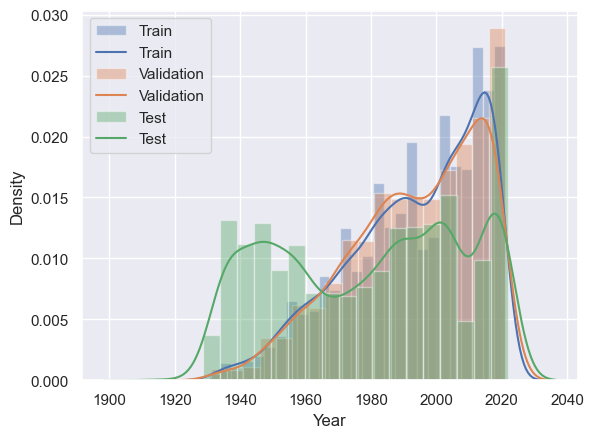

In [40]:
sns.distplot(train_df['Year'].values, label = "Train")
sns.distplot(validation_df['Year'].values, label = "Validation")
sns.distplot(test_df['Year'].values, label = "Test")
plt.legend(['Train', 'Train', 'Validation', 'Validation', 'Test', 'Test'])
plt.xlabel('Year')

plt.show()

- We see that the Train and validation is similarly distributed.
- While the test dat frame with missing values has a very diiferent distribution.
- We can impute the missing values from train into test.
- Even tough the year is a number it is a categorical variable, so we have to fill with mode of the column.

In [41]:
mode_year = train_df['Year'].mode()
test_df['Year'] = test_df['Year'].fillna(2019)

In [42]:
# Checking why the column still shows null values

test_df['Year'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7584 entries, 0 to 15507
Series name: Year
Non-Null Count  Dtype 
--------------  ----- 
7584 non-null   object
dtypes: object(1)
memory usage: 118.5+ KB


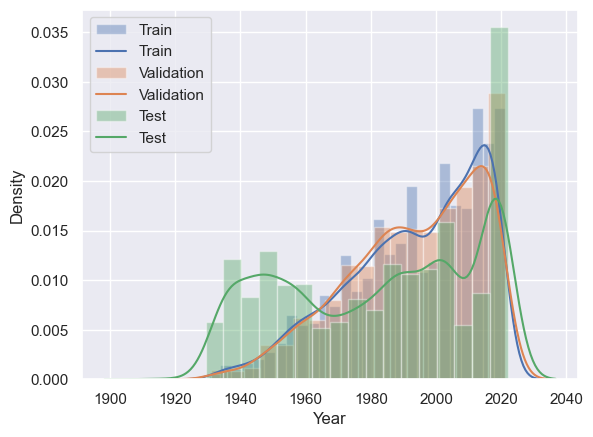

In [43]:
sns.distplot(train_df['Year'].values, label = "Train")
sns.distplot(validation_df['Year'].values, label = "Validation")
sns.distplot(test_df['Year'].values, label = "Test")
plt.legend(['Train', 'Train', 'Validation', 'Validation', 'Test', 'Test'])
plt.xlabel('Year')

plt.show()

In [44]:
# Filling the missing values in duration column

train_df['Duration'] = train_df['Duration'].str.extract('([0-9]+)').astype(float)
train_df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
11500,Rahi,1953,139.0,Drama,7.0,28,Khwaja Ahmad Abbas,Dev Anand,Nalini Jaywant,Balraj Sahni
5167,Gooli,2008,138.0,"Action, Drama, Romance",6.4,80,P. Satya,Sudeep,Mamta Mohandas,Kishore Kumar G.


In [45]:
validation_df['Duration'] = validation_df['Duration'].str.extract('([0-9]+)').astype(float)
validation_df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
12679,Seeking Happily Ever After,2018,104.0,"Drama, Romance",6.8,"1,117",Harish Vyas,Shivani Raghuvanshi,Anshuman Jha,Ekavali Khanna
12294,Samar,1998,126.0,Drama,7.5,31,Shyam Benegal,Rajeshwari Sachdev,Rajit Kapoor,Ravi Jhankal


In [46]:
test_df['Duration'] = test_df['Duration'].str.extract('([0-9]+)').astype(float)
test_df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,2019,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
2,#Homecoming,2021,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


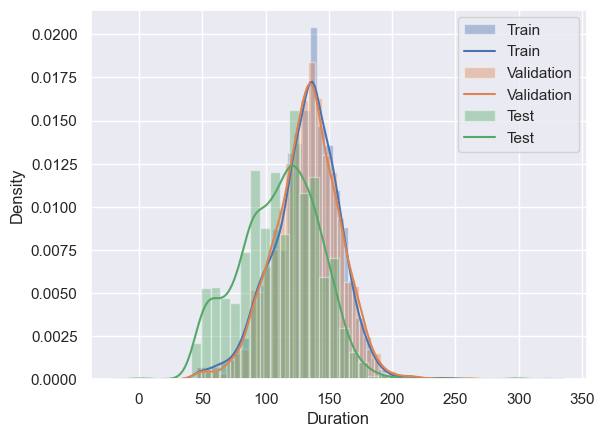

In [47]:
# Checking the distribution of duration

sns.distplot(train_df['Duration'].values, label = "Duration")
sns.distplot(validation_df['Duration'].values, label = "Validation")
sns.distplot(test_df['Duration'].values, label = "Test")
plt.legend(['Train', 'Train', 'Validation', 'Validation', 'Test', 'Test'])
plt.xlabel('Duration')

plt.show()

We can see that the distribution of training and validation is similar while that of test is a bit off

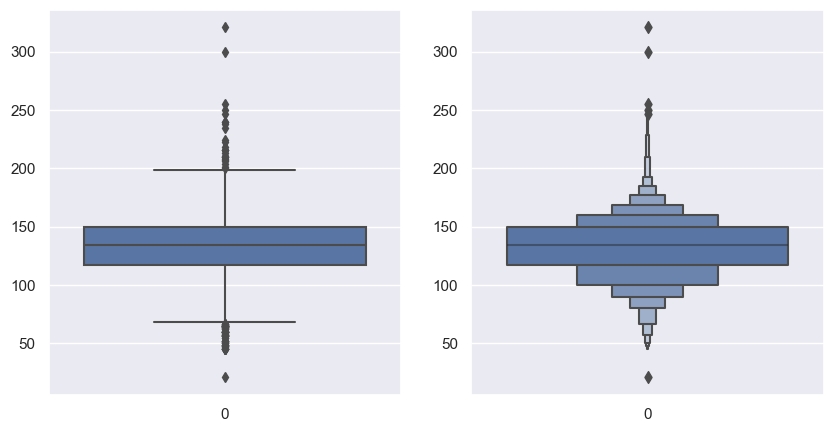

In [48]:
# Checking fo outliers to see if we need to fill the missing values with mean or median

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(train_df['Duration'].values)

plt.subplot(1, 2, 2)
sns.boxenplot(train_df['Duration'].values)

plt.show()

We see outliers in training dataset, so deciding to fill the null values with median of train.

In [49]:
# Filling the missing values

median_duration = train_df['Duration'].median()

train_df['Duration'] = train_df['Duration'].fillna(median_duration)
validation_df['Duration'] = validation_df['Duration'].fillna(median_duration)
test_df['Duration'] = test_df['Duration'].fillna(median_duration)

train_df['Duration'].info()

<class 'pandas.core.series.Series'>
Int64Index: 5939 entries, 11500 to 9574
Series name: Duration
Non-Null Count  Dtype  
--------------  -----  
5939 non-null   float64
dtypes: float64(1)
memory usage: 92.8 KB


In [50]:
validation_df['Duration'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1980 entries, 12679 to 2263
Series name: Duration
Non-Null Count  Dtype  
--------------  -----  
1980 non-null   float64
dtypes: float64(1)
memory usage: 30.9 KB


In [51]:
test_df['Duration'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7584 entries, 0 to 15507
Series name: Duration
Non-Null Count  Dtype  
--------------  -----  
7584 non-null   float64
dtypes: float64(1)
memory usage: 118.5 KB


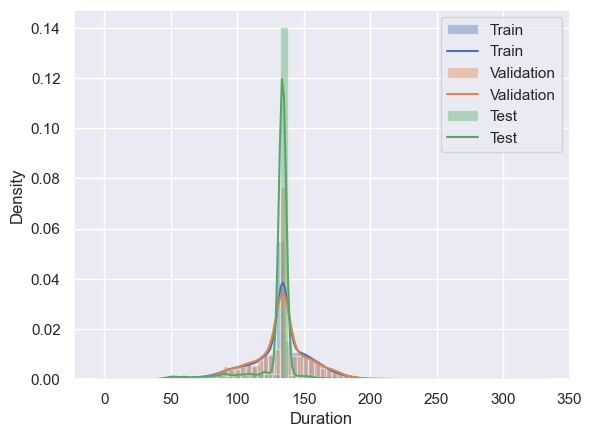

In [52]:
# Seeing the distribution after filling the missing values.

sns.distplot(train_df['Duration'].values, label = "Duration")
sns.distplot(validation_df['Duration'].values, label = "Validation")
sns.distplot(test_df['Duration'].values, label = "Test")
plt.legend(['Train', 'Train', 'Validation', 'Validation', 'Test', 'Test'])
plt.xlabel('Duration')

plt.show()

In [53]:
# Filling the missing values in genre column

def expand_genre(df):
    genres_df = df['Genre'].str.split(', ', expand = True)
    df = pd.concat([df, genres_df], axis = 1)
    df.rename(columns = {0 : 'Genre_1', 1 : 'Genre_2', 2 : 'Genre_3'}, inplace = True)
    df.drop('Genre', axis = 1, inplace = True)
    return df

In [54]:
train_df = expand_genre(train_df)
validation_df = expand_genre(validation_df)
test_df = expand_genre(test_df)

In [55]:
print("Train Genre_1 missing :", (train_df['Genre_1'].isnull().sum() / len(train_df['Genre_1']) * 100))
print("Train Genre_2 missing :", (train_df['Genre_2'].isnull().sum() / len(train_df['Genre_2']) * 100))
print("Train Genre_3 missing :", (train_df['Genre_3'].isnull().sum() / len(train_df['Genre_3']) * 100))
print("Validation Genre_1 missing :", (validation_df['Genre_1'].isnull().sum() / len(validation_df['Genre_1']) * 100))
print("Validation Genre_2 missing :", (validation_df['Genre_2'].isnull().sum() / len(validation_df['Genre_2']) * 100))
print("Validation Genre_3 missing :", (validation_df['Genre_3'].isnull().sum() / len(validation_df['Genre_3']) * 100))
print("Test Genre_1 missing :", (test_df['Genre_1'].isnull().sum() / len(test_df['Genre_1']) * 100))
print("Test Genre_2 missing :", (test_df['Genre_2'].isnull().sum() / len(test_df['Genre_2']) * 100))
print("Test Genre_3 missing :", (test_df['Genre_3'].isnull().sum() / len(test_df['Genre_3']) * 100))

Train Genre_1 missing : 1.3301902677218387
Train Genre_2 missing : 35.948812931469945
Train Genre_3 missing : 64.65734972217545
Validation Genre_1 missing : 1.1616161616161615
Validation Genre_2 missing : 34.24242424242424
Validation Genre_3 missing : 63.98989898989898
Test Genre_1 missing : 23.39135021097046
Test Genre_2 missing : 85.5617088607595
Test Genre_3 missing : 94.35654008438819


We see that the missing values in the second and third sub-genre has missing values more than 35%, we drop the sub-genres

In [56]:
def drop_genre(df):
    df.drop(['Genre_2','Genre_3'], axis = 1, inplace = True)
    df.rename(columns = {'Genre_1' : 'Genre'}, inplace = True)
    return df

train_df = drop_genre(train_df)
validation_df = drop_genre(validation_df)
test_df = drop_genre(test_df)

In [57]:
train_df.head(2)

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre
11500,Rahi,1953,139.0,7.0,28,Khwaja Ahmad Abbas,Dev Anand,Nalini Jaywant,Balraj Sahni,Drama
5167,Gooli,2008,138.0,6.4,80,P. Satya,Sudeep,Mamta Mohandas,Kishore Kumar G.,Action


In [58]:
validation_df.head(2)

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre
12679,Seeking Happily Ever After,2018,104.0,6.8,"1,117",Harish Vyas,Shivani Raghuvanshi,Anshuman Jha,Ekavali Khanna,Drama
12294,Samar,1998,126.0,7.5,31,Shyam Benegal,Rajeshwari Sachdev,Rajit Kapoor,Ravi Jhankal,Drama


In [59]:
test_df.head(2)

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre
0,,2019,134.0,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama
2,#Homecoming,2021,90.0,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama


In [60]:
# Filling the missing values based on Mode Imputaion method 

mode_per_year = train_df.groupby('Year')['Genre'].apply(lambda x: x.mode().iloc[0])    # Gives a df with node of each year
train_df['Genre'] = train_df.apply(lambda row: mode_per_year[row['Year']] if pd.isnull(row['Genre']) else row['Genre'], axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5939 entries, 11500 to 9574
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5939 non-null   object 
 1   Year      5939 non-null   int32  
 2   Duration  5939 non-null   float64
 3   Rating    5939 non-null   float64
 4   Votes     5939 non-null   object 
 5   Director  5935 non-null   object 
 6   Actor 1   5837 non-null   object 
 7   Actor 2   5783 non-null   object 
 8   Actor 3   5713 non-null   object 
 9   Genre     5939 non-null   object 
dtypes: float64(2), int32(1), object(7)
memory usage: 487.2+ KB


In [61]:
validation_df['Genre'] = validation_df.apply(lambda row: mode_per_year[row['Year']] if pd.isnull(row['Genre']) else row['Genre'], axis=1)
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 12679 to 2263
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1980 non-null   object 
 1   Year      1980 non-null   int32  
 2   Duration  1980 non-null   float64
 3   Rating    1980 non-null   float64
 4   Votes     1980 non-null   object 
 5   Director  1979 non-null   object 
 6   Actor 1   1957 non-null   object 
 7   Actor 2   1936 non-null   object 
 8   Actor 3   1914 non-null   object 
 9   Genre     1980 non-null   object 
dtypes: float64(2), int32(1), object(7)
memory usage: 162.4+ KB


In [62]:
# Filling the missing values of the genre in test df with the mode of train df

genre_mode = train_df['Genre'].mode()
genre_mode

0    Drama
Name: Genre, dtype: object

In [63]:
test_df['Genre'] = test_df['Genre'].fillna('Drama')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7584 entries, 0 to 15507
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7584 non-null   object 
 1   Year      7584 non-null   object 
 2   Duration  7584 non-null   float64
 3   Rating    0 non-null      float64
 4   Votes     1 non-null      object 
 5   Director  7065 non-null   object 
 6   Actor 1   6094 non-null   object 
 7   Actor 2   5403 non-null   object 
 8   Actor 3   4736 non-null   object 
 9   Genre     7584 non-null   object 
dtypes: float64(2), object(8)
memory usage: 651.8+ KB


In [72]:
# Treating the missing values in Votes column in test dataset
# Checking the unique values

set(test_df['Votes'].tolist())

{'$5.16M', nan}

In [77]:
# The one non null value seems to be a wrong value, making it to nan

test_df.index[test_df['Votes'] == '$5.16M']

Int64Index([9500], dtype='int64')

In [78]:
test_df['Votes'][9500] = pd.NA

In [79]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7584 entries, 0 to 15507
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7584 non-null   object 
 1   Year      7584 non-null   object 
 2   Duration  7584 non-null   float64
 3   Rating    0 non-null      float64
 4   Votes     0 non-null      object 
 5   Director  7065 non-null   object 
 6   Actor 1   6094 non-null   object 
 7   Actor 2   5403 non-null   object 
 8   Actor 3   4736 non-null   object 
 9   Genre     7584 non-null   object 
dtypes: float64(2), object(8)
memory usage: 909.8+ KB


In [82]:
# Filling the missing values in the names of Directors and actors as 'Not Available'

def fill_names(df):
    df['Director'] = df['Director'].fillna('Not Available')
    df['Actor 1'] = df['Actor 1'].fillna('Not Available')
    df['Actor 2'] = df['Actor 2'].fillna('Not Available')
    df['Actor 3'] = df['Actor 3'].fillna('Not Available')
    return df

train_df = fill_names(train_df)
validation_df = fill_names(validation_df)
test_df = fill_names(test_df)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5939 entries, 11500 to 9574
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5939 non-null   object 
 1   Year      5939 non-null   int32  
 2   Duration  5939 non-null   float64
 3   Rating    5939 non-null   float64
 4   Votes     5939 non-null   object 
 5   Director  5939 non-null   object 
 6   Actor 1   5939 non-null   object 
 7   Actor 2   5939 non-null   object 
 8   Actor 3   5939 non-null   object 
 9   Genre     5939 non-null   object 
dtypes: float64(2), int32(1), object(7)
memory usage: 487.2+ KB


In [84]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 12679 to 2263
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1980 non-null   object 
 1   Year      1980 non-null   int32  
 2   Duration  1980 non-null   float64
 3   Rating    1980 non-null   float64
 4   Votes     1980 non-null   object 
 5   Director  1980 non-null   object 
 6   Actor 1   1980 non-null   object 
 7   Actor 2   1980 non-null   object 
 8   Actor 3   1980 non-null   object 
 9   Genre     1980 non-null   object 
dtypes: float64(2), int32(1), object(7)
memory usage: 162.4+ KB


In [85]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7584 entries, 0 to 15507
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7584 non-null   object 
 1   Year      7584 non-null   object 
 2   Duration  7584 non-null   float64
 3   Rating    0 non-null      float64
 4   Votes     0 non-null      object 
 5   Director  7584 non-null   object 
 6   Actor 1   7584 non-null   object 
 7   Actor 2   7584 non-null   object 
 8   Actor 3   7584 non-null   object 
 9   Genre     7584 non-null   object 
dtypes: float64(2), object(8)
memory usage: 909.8+ KB


In [86]:
# Checking for missing values

train_missing = list(train_df.isnull().sum())
val_missing = list(validation_df.isnull().sum())
test_misisng = list(test_df.isnull().sum())

train_missing_percent = list(train_df.isnull().sum() / len(train_df) * 100)
val_missing_percent = list(validation_df.isnull().sum() / len(validation_df) * 100)
test_misisng_percent = list(test_df.isnull().sum() / len(test_df) * 100)

missing_df = pd.DataFrame({'Columns' : list(train_df.columns), 'Train_missing' : train_missing, 'Percent_Train_missing' : train_missing_percent, 
                'Validation_missing' : val_missing, 'Percent_Val_missing' : val_missing_percent, 'Test_missing' : test_misisng, 
                           'Percent_Test_missing' : test_misisng_percent})
missing_df

,Columns,Train_missing,Percent_Train_missing,Validation_missing,Percent_Val_missing,Test_missing,Percent_Test_missing
0,Name,0,0.0,0,0.0,0,0.0
1,Year,0,0.0,0,0.0,0,0.0
2,Duration,0,0.0,0,0.0,0,0.0
3,Rating,0,0.0,0,0.0,7584,100.0
4,Votes,0,0.0,0,0.0,7584,100.0
5,Director,0,0.0,0,0.0,0,0.0
6,Actor 1,0,0.0,0,0.0,0,0.0
7,Actor 2,0,0.0,0,0.0,0,0.0
8,Actor 3,0,0.0,0,0.0,0,0.0
9,Genre,0,0.0,0,0.0,0,0.0


All the missing data is now cleared

### Exploratory Data Analysis

In [91]:
# Exploring the signficance of every variable

filled_df = pd.concat([train_df, validation_df], axis = 0)
filled_df.head(2)

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre
11500,Rahi,1953,139.0,7.0,28,Khwaja Ahmad Abbas,Dev Anand,Nalini Jaywant,Balraj Sahni,Drama
5167,Gooli,2008,138.0,6.4,80,P. Satya,Sudeep,Mamta Mohandas,Kishore Kumar G.,Action


In [92]:
filled_df['Votes'].info

<bound method Series.info of 11500        28
5167         80
4825         29
3597        395
15080        40
          ...  
65            5
2648      2,236
9224         72
6737         28
2263     22,777
Name: Votes, Length: 7919, dtype: object>

In [94]:
# Votes should be a numberic column, but it is of object datatype, converting the column to numeric datatype

filled_df['Votes'] = filled_df['Votes'].str.replace(',','').astype(int)
train_df['Votes'] = train_df['Votes'].str.replace(',','').astype(int)
validation_df['Votes'] = validation_df['Votes'].str.replace(',','').astype(int)

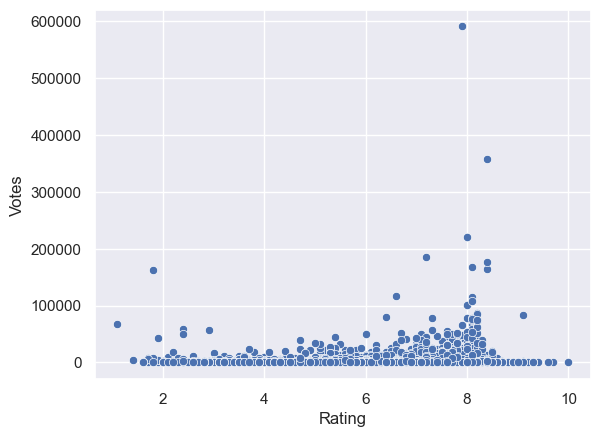

In [97]:
sns.scatterplot(x = filled_df['Rating'], y = filled_df['Votes'])
plt.show()

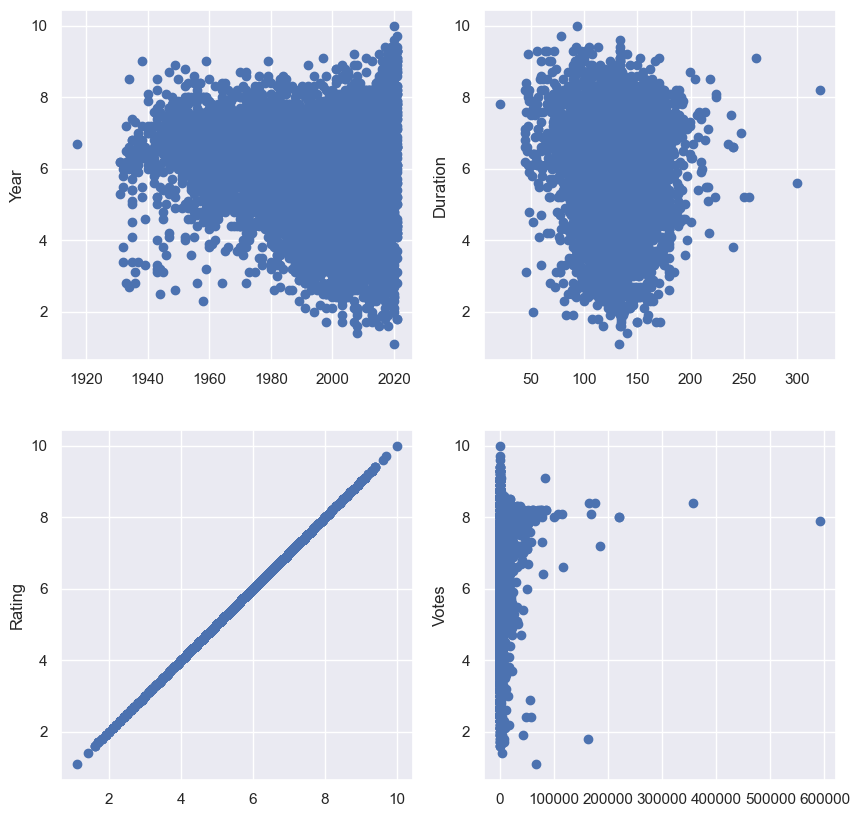

In [107]:
# Visualising the data to understand the significance

numeric_cols = filled_df.select_dtypes(include = np.number)
col_names = list(numeric_cols.columns)
col_index = 0
plt_rows = 2
plt_cols = 2

fig, ax = plt.subplots(nrows = plt_rows, ncols = plt_cols, figsize = (10, 10))

for row_count in range(plt_rows):
    for col_count in range(plt_cols):
        ax[row_count][col_count].scatter(x = filled_df[col_names[col_index]], y = filled_df['Rating'], c = ['b'])
        ax[row_count][col_count].set_ylabel(col_names[col_index])
        col_index += 1

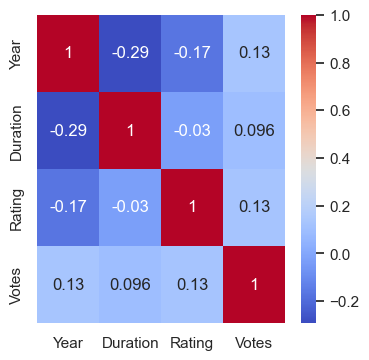

In [111]:
# Checking the heat map

plt.figure(figsize = (4,4))
sns.heatmap(filled_df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

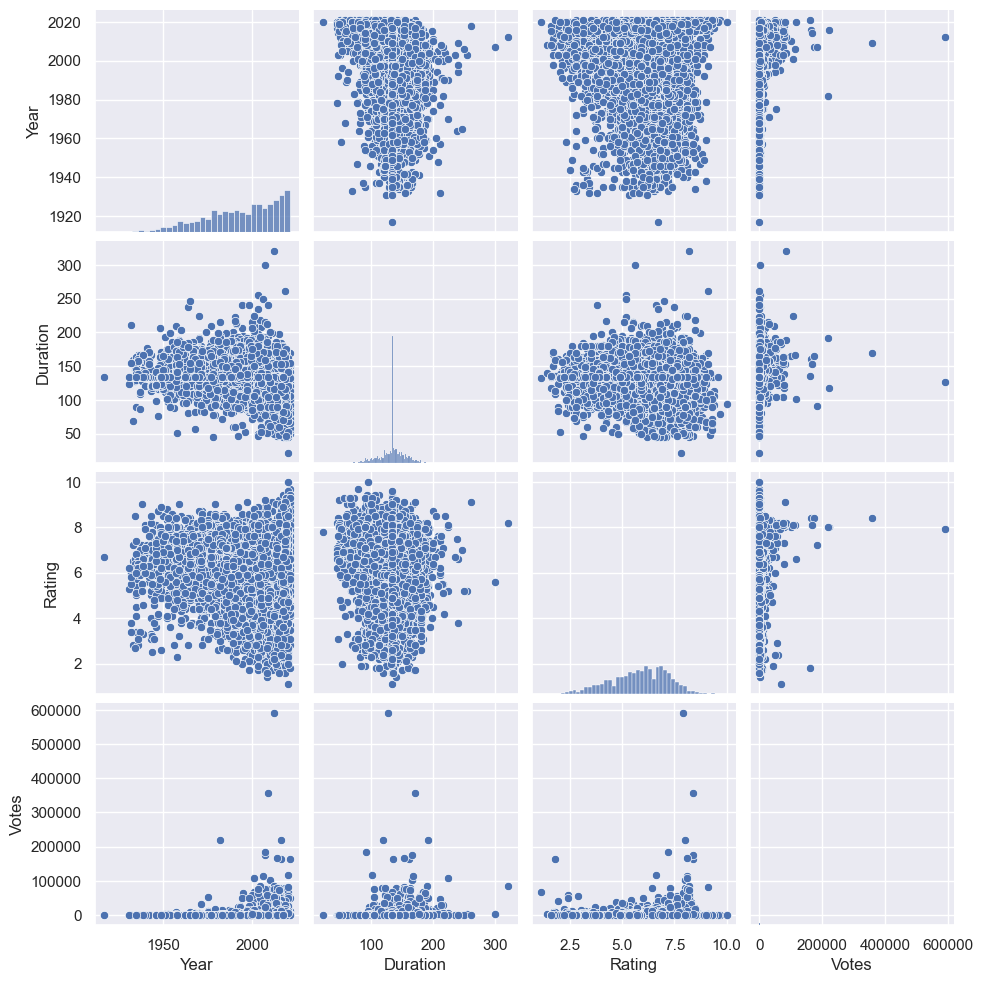

In [112]:
sns.pairplot(filled_df)

#### There is nothing unsual with that we can see from the above visualizations

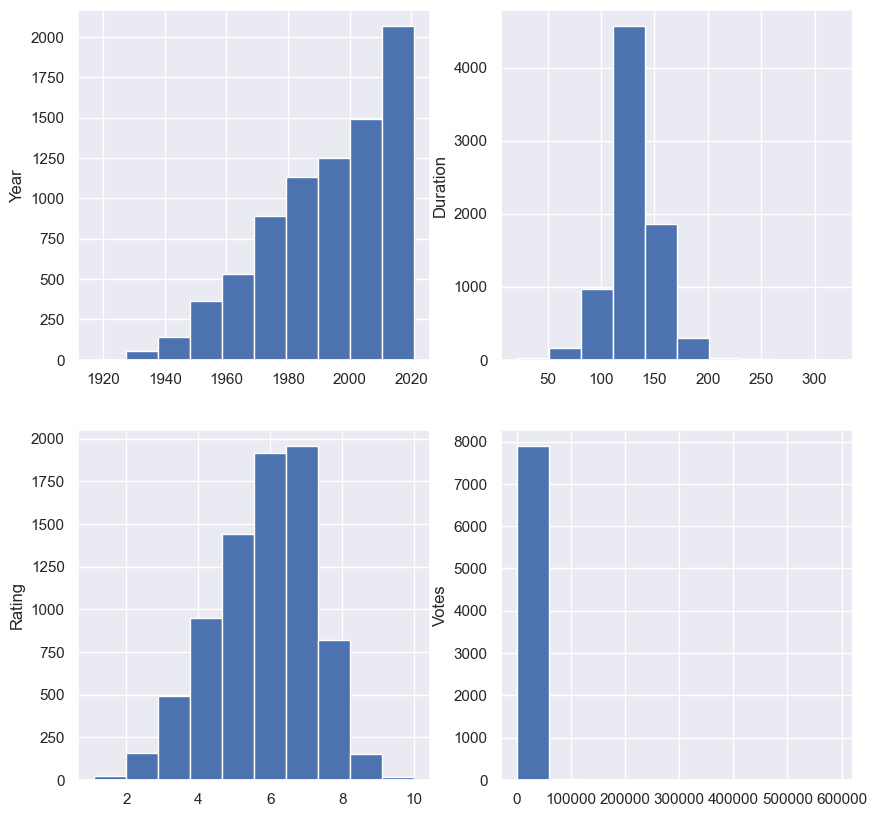

In [117]:
# Checking the distributions of each column

col_index = 0

fig, ax = plt.subplots(nrows = plt_rows, ncols = plt_cols, figsize = (10, 10))

for row_count in range(plt_rows):
    for col_count in range(plt_cols):
        ax[row_count][col_count].hist(filled_df[col_names[col_index]])
        ax[row_count][col_count].set_ylabel(col_names[col_index])
        col_index += 1